<h3>Loeme andmed sisse</h3>

In [1]:
import os, os.path
import json

path = 'data/'
data = []

for file in os.listdir(path):
    filename = os.path.join(path, file)
    with open(filename, "r", encoding = 'utf-8') as fin:
        data.append(json.loads(fin.read()))

<h2>Robustne liigitamine</h2>

<h3>Impordid</h3>

In [91]:
from datetime import datetime
import pandas as pd
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

<h3>Vaatame postituste arvu</h3>

In [3]:
post_dates = []

for post in data:
    time = datetime.strptime(post["meta"]["created_utc"], '%Y-%m-%d %H:%M:%S')
    post_dates.append(time)

In [4]:
posts_per_year = defaultdict(int)
for post in post_dates:
    posts_per_year[post.year] += 1

sorted_data = sorted(posts_per_year.items())

years = [item[0] for item in sorted_data]
num_posts = [item[1] for item in sorted_data]

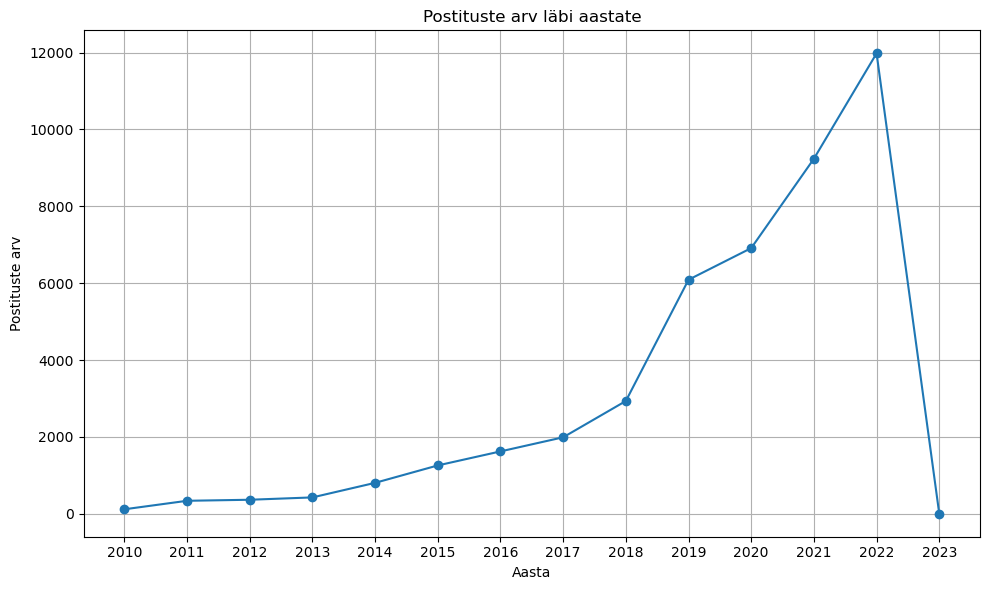

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(years, num_posts, marker='o', linestyle='-')

plt.xlabel('Aasta')
plt.ylabel('Postituste arv')
plt.title('Postituste arv läbi aastate')

plt.xticks(years)

plt.tight_layout()
plt.grid(True)
plt.show()

<h5>Kuna 2023 aastal on veider ilming, siis tundub, et seal on postitusi vähem, mistõttu vaatame, mis ajavahemikus on seal postitused tehtud ning vajadusel jätame 2023 vaatluse alt välja</h5>

In [7]:
posts_per_year

defaultdict(int,
            {2010: 119,
             2011: 340,
             2012: 367,
             2013: 428,
             2014: 807,
             2015: 1260,
             2016: 1625,
             2017: 1992,
             2018: 2936,
             2019: 6091,
             2020: 6914,
             2021: 9239,
             2022: 11981,
             2023: 4})

In [8]:
for post in data:
    created = post["meta"]["created_utc"]
    if created[:4] == "2023":
        print(created)

2023-01-01 00:00:01
2023-01-01 00:16:58
2023-01-01 00:24:40
2023-01-01 01:27:30


<h5>Kuna tegemist on 2023. aasta 4 esimese postitusega, ei saa me 2023. aastat teiste aastatega analüüsi osas võrrelda, sest postitusi on liiga vähe, mistõttu eemaldame 2023. aasta andmed andmestikust</h5>

In [9]:
to_be_deleted = []

for i in range(len(data)):
    created = data[i]["meta"]["created_utc"]
    if created[:4] == "2023":
        to_be_deleted.append(i)

In [10]:
to_be_deleted.sort(reverse=True)
to_be_deleted

[44102, 44101, 44100, 44099]

In [11]:
for i in to_be_deleted:
    del data[i]

<h5>Kontrollime, kas 2023. aasta andmed on veel andmestikus.</h5>

In [13]:
kontroll = False

for post in data:
    created = post["meta"]["created_utc"]
    if created[:4] == "2023":
        kontroll = True

print(kontroll)

False


<h3>Vaatame <i>Upvote</i>-e</h3>

In [14]:
score_n_time = dict()

for post in data:
    time = datetime.strptime(post["meta"]["created_utc"], '%Y-%m-%d %H:%M:%S')
    score = post["meta"]["score"]
    score_n_time[time] = score

In [15]:
yearly_scores = defaultdict(list)
for date, score in score_n_time.items():
    yearly_scores[date.year].append(score)

average_scores = {year: sum(scores) / len(scores) for year, scores in yearly_scores.items()}

sorted_data = sorted(average_scores.items())

years = [item[0] for item in sorted_data]
scores = [item[1] for item in sorted_data]

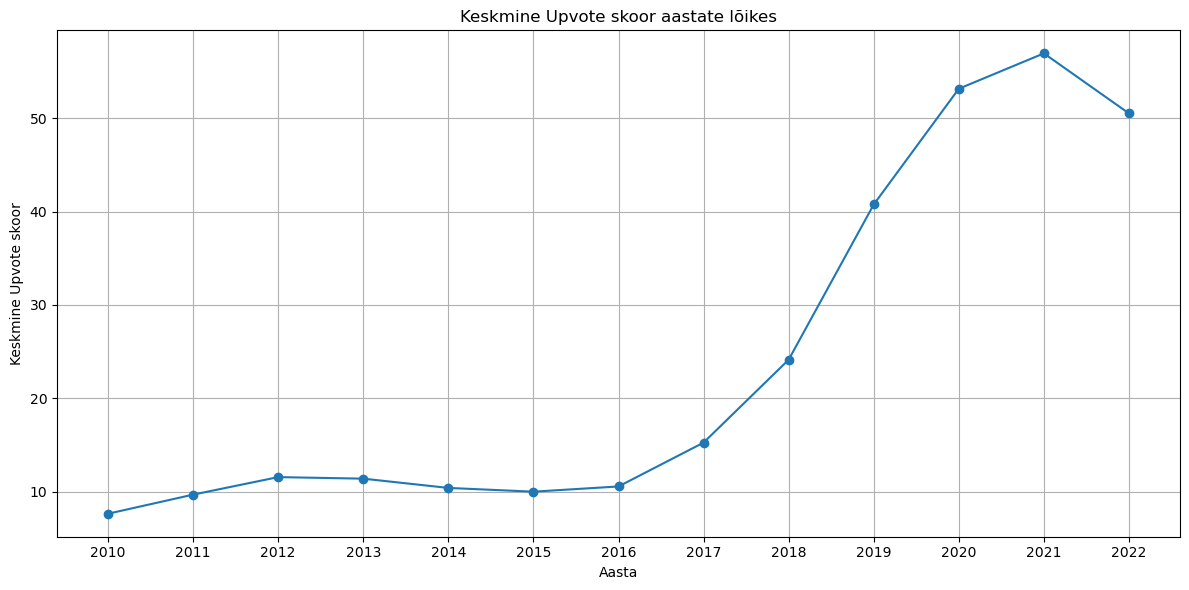

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(years, scores, marker='o', linestyle='-')

plt.xlabel('Aasta')
plt.ylabel('Keskmine Upvote skoor')
plt.title('Keskmine Upvote skoor aastate lõikes')
plt.xticks(years)

plt.tight_layout()
plt.grid(True)
plt.show()

<h3>Vaatame postituste kommentaaride arvu</h3>

In [21]:
comments = dict()

for post in data:
    time = datetime.strptime(post["meta"]["created_utc"], '%Y-%m-%d %H:%M:%S')
    num_comments = post["meta"]["num_comments"]
    comments[time] = num_comments

yearly_scores = defaultdict(list)
for date, score in comments.items():
    yearly_scores[date.year].append(score)

average_scores = {year: sum(scores) / len(scores) for year, scores in yearly_scores.items()}

sorted_data = sorted(average_scores.items())

years = [item[0] for item in sorted_data]
scores = [item[1] for item in sorted_data]

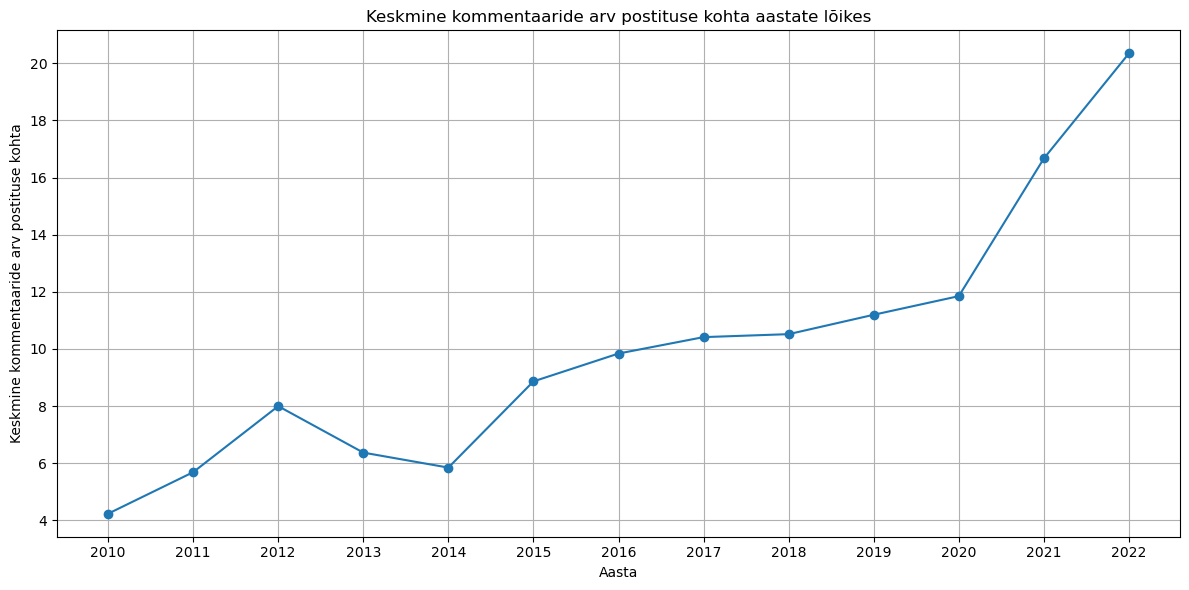

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(years, scores, marker='o', linestyle='-')

plt.xlabel('Aasta')
plt.ylabel('Keskmine kommentaaride arv postituse kohta')
plt.title('Keskmine kommentaaride arv postituse kohta aastate lõikes')
plt.xticks(years)

plt.tight_layout()
plt.grid(True)
plt.show()

<h3>Vaatame, millist liiki postitusi üldse tehakse</h3>
On olemas 4 erinevat liiki postitusi:
<ul>
    <li>Tekstipostitus</li>
    <li>Pilt või video</li>
    <li>Link</li>
    <li>Küsitlus (<i>Poll</i>)</li>
</ul>

In [23]:
videos = []
images = []
texts = []
links = []
polls = []
ülejääk = []

for i in data:
    if 'post_hint' in i['meta'] and i['meta']['post_hint'] == 'link':
        links.append(i)
    elif "poll_data" in i["meta"]:
        polls.append(i)
    elif 'post_hint' in i['meta'] and i['meta']['post_hint'] == 'image':
        images.append(i)
    elif 'post_hint' in i['meta'] and i['meta']['post_hint'] == 'rich:video':
        videos.append(i)   
    elif i['meta']['is_self'] == True:
        texts.append(i)
    elif 'is_video' in i['meta'] and i['meta']['is_video'] == True:
        videos.append(i)
    else:
        ülejääk.append(i)

<p>Kuna tõenäoliselt on Redditi API andmestruktuur ajas muutunud, ei ole kõikidiel postitustel juures muutujat "post_hint", mistõttu uurime postituse URL muutujat piltide ära tundmiseks.</p>

In [24]:
ülejäänud_lingid = []
ülejäänud_pildid = []

for i in ülejääk:
    url = i["meta"]["url"]

    if url == None:
        ülejäänud_lingid.append(i)
    else:
        if url[-4:] == ".jpg":
            ülejäänud_pildid.append(i)
        elif url[-4:] == ".png":
            ülejäänud_pildid.append(i)
        else:
            ülejäänud_lingid.append(i)

In [25]:
len(data)

44099

In [26]:
len(videos) + len(images) + len(texts) + len(links) + len(polls) + len(ülejäänud_lingid) + len(ülejäänud_pildid)

44099

In [27]:
images += ülejäänud_pildid
links += ülejäänud_lingid

In [28]:
len(videos) + len(images) + len(texts) + len(links) + len(polls)

44099

<h5>Postituste liikide jagunemine graafikul</h5>

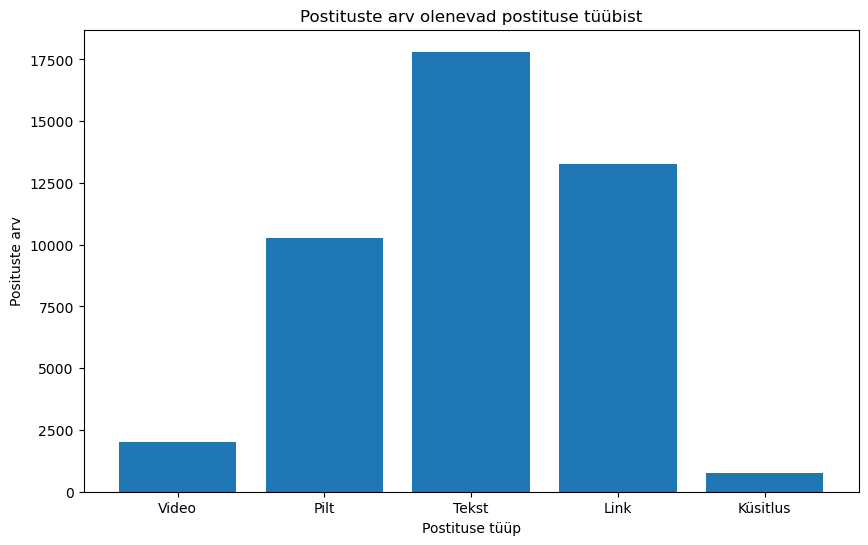

In [32]:
posts_dict = {"videos":len(videos), "images":len(images), "texts":len(texts), "links":len(links), "polls":len(polls)}

labels = list(posts_dict.keys())
values = list(posts_dict.values())
type_labels = ["Video", "Pilt", "Tekst", "Link", "Küsitlus"]
plt.figure(figsize=(10, 6))
plt.bar(type_labels, values)

plt.xlabel('Postituse tüüp')
plt.ylabel('Posituste arv')
plt.title('Postituste arv olenevad postituse tüübist')

plt.show()

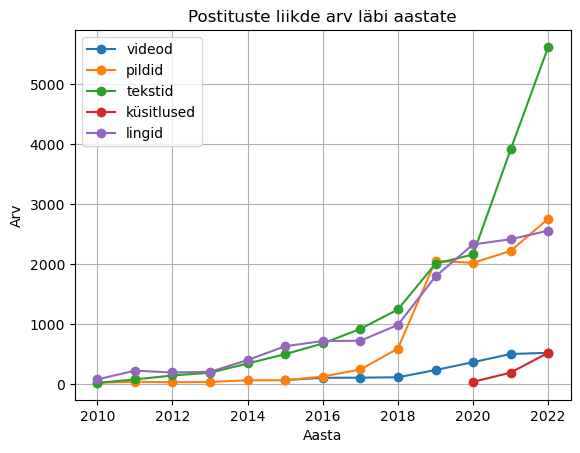

In [90]:
def plot_post_type(post_type_data, label):
    # võtan iga postituse seest välja aja, mil see loodi
    post_time = []
    for post in post_type_data:
        post_time.append(post["meta"]["created_utc"])

    # võtan välja ainult aastad 
    years = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').year for ts in post_time]
    
    # loendan iga aasta
    yearly_counts = Counter(years)
    
    # sorteerin aastate järgi
    sorted_years = sorted(yearly_counts)
    counts = [yearly_counts[year] for year in sorted_years]
    
    plt.plot(sorted_years, counts, marker='o', linestyle='-', label=label)


plot_post_type(videos, "videod")
plot_post_type(images, "pildid")
plot_post_type(texts, "tekstid")
plot_post_type(polls, "küsitlused")
plot_post_type(links, "lingid")
#plot_post_type(data, "kõik")

plt.xlabel('Aasta')
plt.ylabel('Arv')
plt.title('Postituste liikde arv läbi aastate')
plt.grid(True)
plt.legend()
plt.show()

<h5>Leiame enim kasutatud domeenid linkide puhul</h5>

In [94]:
domains = []

for i in links:
    domains.append(i['meta']['domain'])

element_counts = Counter(domains)

# Convert the counts into a DataFrame
df = pd.DataFrame(element_counts.items(), columns=['Domain', 'Count'])

# Sort the DataFrame by counts in descending order
df = df.sort_values(by='Count', ascending=False).reset_index(drop=True)

df = df.dropna()

df = df[df['Domain'] != '']

# Display the DataFrame
print(df[:40])

                     Domain  Count
0                    err.ee   2518
1                  delfi.ee    677
2               youtube.com    615
3                reddit.com    525
4                 imgur.com    412
5              postimees.ee    391
6              epl.delfi.ee    390
8                  youtu.be    292
9                 v.redd.it    264
10          novaator.err.ee    240
11        ekspress.delfi.ee    179
12              news.err.ee    160
13         arileht.delfi.ee    146
14             facebook.com    136
15     arvamus.postimees.ee    127
16              twitter.com    111
17              ohtuleht.ee    111
18               m.delfi.ee     98
19        estonianworld.com     86
21        leht.postimees.ee     69
22  majandus24.postimees.ee     68
23   poliitika.postimees.ee     64
24           kultuur.err.ee     57
25           forte.delfi.ee     56
26          raha.geenius.ee     52
27              menu.err.ee     52
28              nytimes.com     51
29       tartu.posti

<h5>Eemaldame alamdomeenid, et saaksime paremini aimu, milliseid peadomeene enim kasutatakse/edasi jagatakse lingipostitusena</h5>
<p>Nagu tulemustest allpool näha, sisaldab see ka youtube'i, imgur'i jpm linke. Tegemist on video ja pildi majutamise teenustega, kuid kuna me hetkel vaatame lingipostitusi, tähendab see seda, et eksisteerivad olukorrad, kus kasutajad loovad linkpostituse ning jagavad seal youtube'i linki - vastava youtube'i lingi embeddib Redditi keskkond ise ära ning postitus justkui oleks video postitus, kuid tegelikult märgitakse ka API-s, et tegemist on link tüüpi postitusega.</p>

In [85]:
main_domain = []
ds = ["i.redd.it"]
for d in domains:
    if d != None:
        split = d.split(".")
        domain = ".".join(split[-2:])
        main_domain.append(domain)

element_counts = Counter(main_domain)

# Convert the counts into a DataFrame
df_main_domain = pd.DataFrame(element_counts.items(), columns=['Main_domain', 'Count'])

df_main_domain = df_main_domain.dropna()

df_main_domain = df_main_domain[df_main_domain['Main_domain'] != '']

# Sort the DataFrame by counts in descending order
df_main_domain = df_main_domain.sort_values(by='Count', ascending=False).reset_index(drop=True)

In [86]:
print(df_main_domain[:40])

           Main_domain  Count
0               err.ee   3144
1             delfi.ee   1797
2         postimees.ee   1159
3          youtube.com    633
4           reddit.com    541
5            imgur.com    455
6              redd.it    294
7             youtu.be    292
8           geenius.ee    200
9         facebook.com    154
10         ohtuleht.ee    138
11         twitter.com    116
12   estonianworld.com     86
13               co.uk     73
14          google.com     65
15         nytimes.com     51
16     baltictimes.com     47
17      uueduudised.ee     45
18        objektiiv.ee     45
19         laanlane.ee     44
20             bbc.com     37
21         reuters.com     36
22      soundcloud.com     34
23           levila.ee     34
24       wikipedia.org     33
25     theguardian.com     32
26          medium.com     30
27       bloomberg.com     28
28       wordpress.com     28
29            eesti.ca     27
30  washingtonpost.com     26
31          discord.gg     24
32        

In [87]:
df_main_domain = df_main_domain.replace("redd.it", "reddit.com")
df_main_domain = df_main_domain.replace("youtu.be", "youtube.com")

In [88]:
df_main_domain[:12]

,Main_domain,Count
0,err.ee,3144
1,delfi.ee,1797
2,postimees.ee,1159
3,youtube.com,633
4,reddit.com,541
5,imgur.com,455
6,reddit.com,294
7,youtube.com,292
8,geenius.ee,200
9,facebook.com,154


In [98]:
list(df_main_domain.Main_domain[:12])

['err.ee',
 'delfi.ee',
 'postimees.ee',
 'youtube.com',
 'reddit.com',
 'imgur.com',
 'reddit.com',
 'youtube.com',
 'geenius.ee',
 'facebook.com',
 'ohtuleht.ee',
 'twitter.com']

In [120]:
popular_domains = []
popular_domains_time = []
check_popular_domains = ['err.ee', 'delfi.ee', 'postimees.ee', 'youtube.com', 'reddit.com', 'youtu.be', 'redd.it', 'imgur.com', 'geenius.ee', 'facebook.com', 'ohtuleht.ee', 'twitter.com']

for i in links:
    current_domain = i['meta']['domain']
    if current_domain is not None:
        if current_domain in check_popular_domains:
            if current_domain == 'youtu.be':
                popular_domains.append("youtube.com")
            elif current_domain == 'redd.it':
                popular_domains.append("reddit.com")
            else:
                popular_domains.append(current_domain)
                
            popular_domains_time.append(i['meta']['created_utc'])

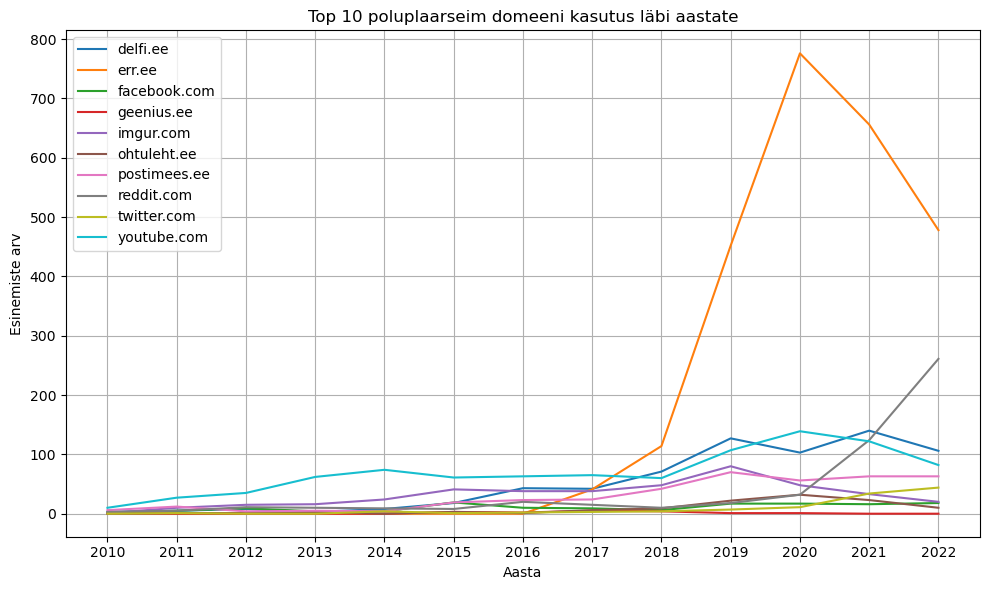

In [122]:
#domains
#domains_time

domain_years = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').year for ts in popular_domains_time]

domain_df = pd.DataFrame({'domain': popular_domains, 'year': popular_domains_time})

domain_df['year'] = [datetime.strptime(ts, '%Y-%m-%d %H:%M:%S').year for ts in domain_df['year']]

usage_counts = domain_df.groupby(['domain', domain_df['year']]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
for domain in usage_counts.index:
    plt.plot(usage_counts.columns, usage_counts.loc[domain], label=domain)

plt.xlabel('Aasta')
plt.ylabel('Esinemiste arv')
plt.title('Top 10 poluplaarseim domeeni kasutus läbi aastate')
plt.xticks(usage_counts.columns)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
main_domain_joined = ""
for i in range(len(df_main_domain)):
    main_domain_joined += (df_main_domain.iloc[i].Main_domain.split(".")[0] + " ") * int(df_main_domain.iloc[i].Count)

In [47]:
main_domain_cleaned = []
for i in main_domain:
    main_domain_cleaned.append(i.split(".")[0])
    
main_domain_joined = " ".join(main_domain_cleaned)

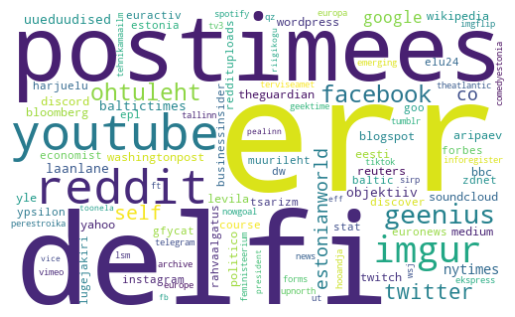

In [69]:
wordcloud = WordCloud(max_font_size = 160, max_words = 100, width = 500, height = 300, background_color = 'white', collocations=False).generate(main_domain_joined)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [70]:
wordcloud.to_file('wordcloud_links.png')